## Amazon Fine Food Reviews
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import math
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/colab/Big data/Reviews_withURL.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProductURL
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,https://www.amazon.com/dp/B001E4KFG0
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,https://www.amazon.com/dp/B00813GRG4
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,https://www.amazon.com/dp/B000LQOCH0
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,https://www.amazon.com/dp/B000UA0QIQ
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,https://www.amazon.com/dp/B006K2ZZ7K
...,...,...,...,...,...,...,...,...,...,...,...,...
568422,568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,https://www.amazon.com/dp/B001EO7N10
568423,568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,https://www.amazon.com/dp/B003S1WTCU
568424,568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",https://www.amazon.com/dp/B004I613EE
568425,568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,https://www.amazon.com/dp/B004I613EE


## Product Review Sentiment Analysis

In [ ]:
df=df[['Score','Summary','Text','ProductId']]
df.head()

,Score,Summary,Text,ProductId
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,B001E4KFG0
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,B00813GRG4
2,4,"""Delight"" says it all",This is a confection that has been around a fe...,B000LQOCH0
3,2,Cough Medicine,If you are looking for the secret ingredient i...,B000UA0QIQ
4,5,Great taffy,Great taffy at a great price. There was a wid...,B006K2ZZ7K


### clean text

In [ ]:
import re
def clean_text(Review):
  Review = str(Review).lower() # convert to lowercase
  Review = re.sub('\[.*?\]', '', Review) 
  Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
  Review = re.sub('<.*?>+', '', Review)
  Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
  Review = re.sub('\n', '', Review)
  Review = re.sub('\w*\d\w*', '', Review)
  return Review

df['Review'] = df['Summary'].apply(clean_text)
df.head()

,Score,Summary,Text,ProductId,Review
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,B001E4KFG0,good quality dog food
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,B00813GRG4,not as advertised
2,4,"""Delight"" says it all",This is a confection that has been around a fe...,B000LQOCH0,delight says it all
3,2,Cough Medicine,If you are looking for the secret ingredient i...,B000UA0QIQ,cough medicine
4,5,Great taffy,Great taffy at a great price. There was a wid...,B006K2ZZ7K,great taffy


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 25.5 MB/s 


## Sentiment analyze for summary

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# collect each reviews
reviews = []
for i in range(len(df['Review'])):
  reviews.append(df['Review'][i])

analyzer = SentimentIntensityAnalyzer()
for sentence in reviews[:20]:
  vs = analyzer.polarity_scores(sentence)
  print("{:.<65} {}".format(sentence, str(vs)))

good quality dog food............................................ {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
not as advertised................................................ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
delight says it all.............................................. {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}
cough medicine................................................... {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
great taffy...................................................... {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
nice taffy....................................................... {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}
great  just as good as the expensive brands...................... {'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.7906}
wonderful tasty taffy............................................ {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719

In [ ]:
df['sentiment'] = 'sentiment'

i,neu,pos,neg = 0,0,0,0
for sentence in reviews:
  vs = analyzer.polarity_scores(sentence)
  if vs['neg'] > 0.5:
    neg+=1
    df['sentiment'][i] = 'neg'
  elif vs['pos'] > 0.5:
    pos+=1
    df['sentiment'][i] = 'pos'
  else :
    neu+=1
    df['sentiment'][i] = 'neu'
  i += 1
  
  if i%20000 == 0:
    print(i)

sentiments = ['neu','pos','neg']
counts = [neu,pos,neg]
sentiment_df = {"sentiments":sentiments,"counts":counts}
sentiment_df = pd.DataFrame(sentiment_df)

20000
40000
60000
80000
100000
120000
140000
160000
180000
200000
220000
240000
260000
280000
300000
320000
340000
360000
380000
400000
420000
440000
460000
480000
500000
520000
540000
560000


## distribution 

  sentiments  counts
0        neu  300153
1        pos  242331
2        neg   25943


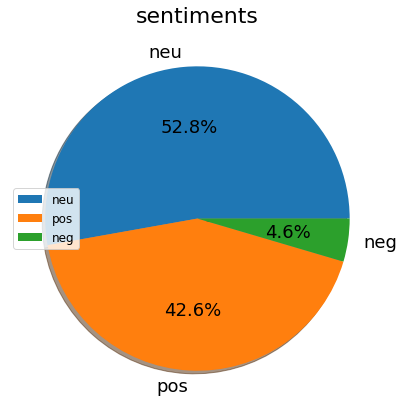

In [ ]:
print(sentiment_df)
fig ,ax = plt.subplots(figsize=(10,7))
ax.pie(sentiment_df.counts,
    labels=['neu','pos','neg'],
    autopct='%.1f%%', # 比例格式
    shadow = True,
    textprops = {'fontsize':18})
ax.set_title("sentiments",fontsize=22)
ax.legend(sentiments, loc=6, fontsize='large')
plt.show()

In [ ]:
df['pos_sentiment']=0
df['neg_sentiment']=0

for i in range(len(df)):
  if df['sentiment'][i] == 'neg':
    df['neg_sentiment'][i] = 1
  elif df['sentiment'][i] == 'pos':
    df['pos_sentiment'][i] = 1
df

,Score,Summary,Text,ProductId,Review,sentiment,pos_sentiment,neg_sentiment
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,B001E4KFG0,good quality dog food,neu,0,0
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,B00813GRG4,not as advertised,neu,0,0
2,4,"""Delight"" says it all",This is a confection that has been around a fe...,B000LQOCH0,delight says it all,pos,1,0
3,2,Cough Medicine,If you are looking for the secret ingredient i...,B000UA0QIQ,cough medicine,neu,0,0
4,5,Great taffy,Great taffy at a great price. There was a wid...,B006K2ZZ7K,great taffy,pos,1,0
...,...,...,...,...,...,...,...,...
568422,5,Will not do without,Great for sesame chicken..this is a good if no...,B001EO7N10,will not do without,neu,0,0
568423,2,disappointed,I'm disappointed with the flavor. The chocolat...,B003S1WTCU,disappointed,neg,0,1
568424,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",B004I613EE,perfect for our maltipoo,pos,1,0
568425,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,B004I613EE,favorite training and reward treat,pos,1,0


## number of positive review in every product


In [ ]:
pos = df.groupby(['ProductId'])['pos_sentiment'].aggregate('sum').reset_index().sort_values('pos_sentiment', ascending=False, axis=0)
pos.columns = ['ProductId', 'positive']
pos = pos[:10] #top 10
pos

,ProductId,positive
71170,B007JFMH8M,517
46205,B003B3OOPA,356
28624,B001EO5Q64,335
16945,B000NMJWZO,322
42263,B002QWP89S,320
42257,B002QWHJOU,320
42264,B002QWP8H0,320
37898,B0026RQTGE,320
35243,B001RVFEP2,277
71327,B007M83302,277


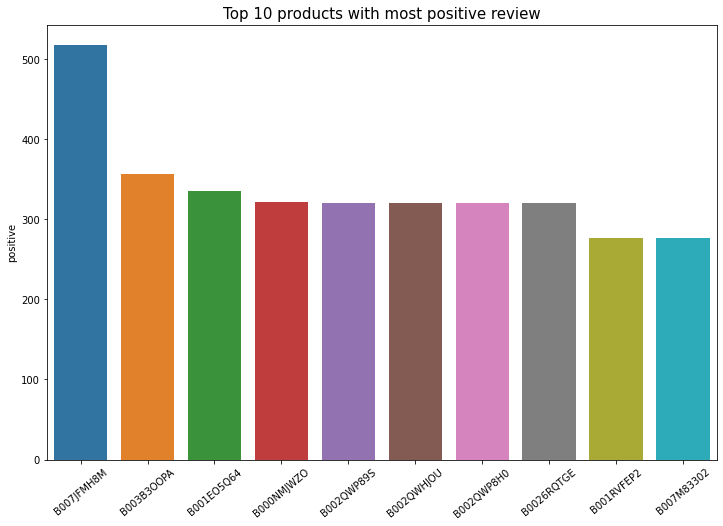

In [ ]:
plt.figure(figsize=(12,8))
plot = sns.barplot(np.arange(10),pos.positive)
plt.xticks(np.arange(10),pos.ProductId,fontsize=10,rotation=40)
plt.ylabel='count'
plt.title('Top 10 products with most positive review',fontsize=15)
plt.show()

## number of negtive review in every product


In [ ]:
neg = df.groupby(['ProductId'])['neg_sentiment'].aggregate('sum').reset_index().sort_values('neg_sentiment', ascending=False, axis=0)
neg.columns = ['ProductId', 'negitive']
neg = neg[:10] #top 10
neg

,ProductId,negitive
21233,B000X1Q1G8,65
49685,B003TC7WN4,47
56851,B004FGWU9O,47
50501,B003VXFK44,47
50506,B003VXHGPK,47
69177,B006N3IE6A,47
69178,B006N3IG4K,47
50509,B003VXL0V6,47
50504,B003VXHGDM,47
50505,B003VXHGE6,47


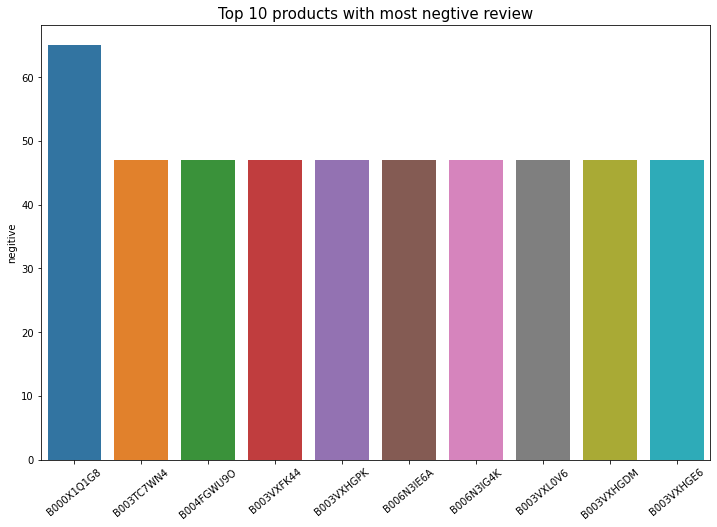

In [ ]:
plt.figure(figsize=(12,8))
plot = sns.barplot(np.arange(10),neg.negitive)
plt.xticks(np.arange(10),neg.ProductId,fontsize=10,rotation=40)
plt.ylabel='count'
plt.title('Top 10 products with most negtive review',fontsize=15)
plt.show()